<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">


# Dummy variables
---



## Learning Objectives

### Core

- Know the difference between numerical and categorical predictors
- Use `pd.get_dummies` to transform categorical variables into numerical format
- Know about redundant variables

### Target

- Fit a regression model using both numerical and categorical predictors
- Interpret the model coefficients of categorical predictor variables


<h1>Lesson Guide<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Learning-Objectives" data-toc-modified-id="Learning-Objectives-1">Learning Objectives</a></span><ul class="toc-item"><li><span><a href="#Core" data-toc-modified-id="Core-1.1">Core</a></span></li><li><span><a href="#Target" data-toc-modified-id="Target-1.2">Target</a></span></li></ul></li><li><span><a href="#Categorical-predictors" data-toc-modified-id="Categorical-predictors-2">Categorical predictors</a></span></li><li><span><a href="#Example-for-dummifying" data-toc-modified-id="Example-for-dummifying-3">Example for dummifying</a></span><ul class="toc-item"><li><span><a href="#Seaborn-tips-data" data-toc-modified-id="Seaborn-tips-data-3.1">Seaborn tips data</a></span></li><li><span><a href="#Dummify-one-column" data-toc-modified-id="Dummify-one-column-3.2">Dummify one column</a></span></li><li><span><a href="#Dummify-all-variables" data-toc-modified-id="Dummify-all-variables-3.3">Dummify all variables</a></span><ul class="toc-item"><li><span><a href="#Redundant-variables" data-toc-modified-id="Redundant-variables-3.3.1">Redundant variables</a></span></li></ul></li><li><span><a href="#Fit-the-model" data-toc-modified-id="Fit-the-model-3.4">Fit the model</a></span><ul class="toc-item"><li><span><a href="#Choose-outcome-and-predictor-variables" data-toc-modified-id="Choose-outcome-and-predictor-variables-3.4.1">Choose outcome and predictor variables</a></span></li><li><span><a href="#Create-train-test-split" data-toc-modified-id="Create-train-test-split-3.4.2">Create train-test split</a></span></li><li><span><a href="#Rescale-the-variables" data-toc-modified-id="Rescale-the-variables-3.4.3">Rescale the variables</a></span></li><li><span><a href="#Linear-regression-model" data-toc-modified-id="Linear-regression-model-3.4.4">Linear regression model</a></span></li><li><span><a href="#Lasso-model" data-toc-modified-id="Lasso-model-3.4.5">Lasso model</a></span></li></ul></li><li><span><a href="#Drop-redundant-variables" data-toc-modified-id="Drop-redundant-variables-3.5">Drop redundant variables</a></span></li><li><span><a href="#Fit-the-model" data-toc-modified-id="Fit-the-model-3.6">Fit the model</a></span><ul class="toc-item"><li><span><a href="#Create-train-test-split" data-toc-modified-id="Create-train-test-split-3.6.1">Create train-test split</a></span></li><li><span><a href="#Rescale-the-variables" data-toc-modified-id="Rescale-the-variables-3.6.2">Rescale the variables</a></span></li><li><span><a href="#Linear-regression-model" data-toc-modified-id="Linear-regression-model-3.6.3">Linear regression model</a></span></li><li><span><a href="#Lasso-model" data-toc-modified-id="Lasso-model-3.6.4">Lasso model</a></span></li></ul></li><li><span><a href="#Interpret-the-model-coefficients-of-dummy-variables" data-toc-modified-id="Interpret-the-model-coefficients-of-dummy-variables-3.7">Interpret the model coefficients of dummy variables</a></span></li></ul></li><li><span><a href="#Dummy-practice" data-toc-modified-id="Dummy-practice-4">Dummy practice</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 

sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## Categorical predictors

You may note that in our examples so far our independent variable $X$ is quantitative. This need not be the case. In many cases, we'll use qualitative variables to explain quantitative outcomes. Some examples:

- One's sex and education are often linked to income.
- The day of the week might explain a bar's profits or the month of the year might affect an airlines' revenues.
- Whether or not someone has children above 5 might help to predict when he/she will go on holiday.

If you have a variable that is categorical, you will need to "dummy code" it:
- Check out [a worked out example](https://chrisalbon.com/python/data_wrangling/pandas_convert_categorical_to_dummies/) 
- and/or [the Pandas documentation](http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.get_dummies.html) to see this implemented in Python.

Practically, dummy variables come into play more in **multiple linear regression** (MLR), but it can technically apply to SLR and it's something of which you should be aware of.

The following dataset contains categorical variables. 

- Pick one of the categorical variables, for example `sex`.
- Use `pd.get_dummies` to create a dummy variable.
- Fit `tips` on one of the resulting dummy variables (for example `Male`).
- How do you interpret the regression coefficients?

## Example for dummifying

### Seaborn tips data

In [2]:
tips = sns.load_dataset("tips")
print(tips.shape)
tips.head(3)

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


We want to predict the amount of tip given the other quantities. Correlations can only be calculated between the numerical variables.

In [3]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


### Dummify one column

To make use of the categorical variables, we have to dummify them. We use panda's `pd.get_dummies` function.

We can apply it to a choice of columns, for example `sex`.

In [4]:
tips_temp = pd.get_dummies(tips,columns=['sex',"smoker"])
tips_temp.head()

,total_bill,tip,day,time,size,sex_Male,sex_Female,smoker_Yes,smoker_No
0,16.99,1.01,Sun,Dinner,2,0,1,0,1
1,10.34,1.66,Sun,Dinner,3,1,0,0,1
2,21.01,3.50,Sun,Dinner,3,1,0,0,1
3,23.68,3.31,Sun,Dinner,2,1,0,0,1
4,24.59,3.61,Sun,Dinner,4,0,1,0,1


Of course the columns for male and female are completely anticorrelated.

In [5]:
tips_temp[['sex_Male','sex_Female']].corr()

,sex_Male,sex_Female
sex_Male,1.0,-1.0
sex_Female,-1.0,1.0


### Dummify all variables

We can also simply apply `pd.get_dummies` to the whole dataframe. All object type columns will be transformed. If the categories in a column are coded numerically (like 1, 2, 3) it will be necessary to tell pandas to transform that column by indicating it explicitly.

In [6]:
tips_dum = pd.get_dummies(tips)
tips_dum.head()

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,0,1,0,1,0,0,0,1,0,1
1,10.34,1.66,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3.50,3,1,0,0,1,0,0,0,1,0,1
3,23.68,3.31,2,1,0,0,1,0,0,0,1,0,1
4,24.59,3.61,4,0,1,0,1,0,0,0,1,0,1


#### Redundant variables

> For binary variables we see the anticorrelations in the heatmap (not being smoker implies being non-smoker). 

> For variables with more than two categories, we know that we have one category if it is not in any of the remaining categories. For example, if the entry for days from Monday to Saturday is zero, we know that we have Sunday. That is not reflected in pairwise correlation, but still we have a variable which is redundant.

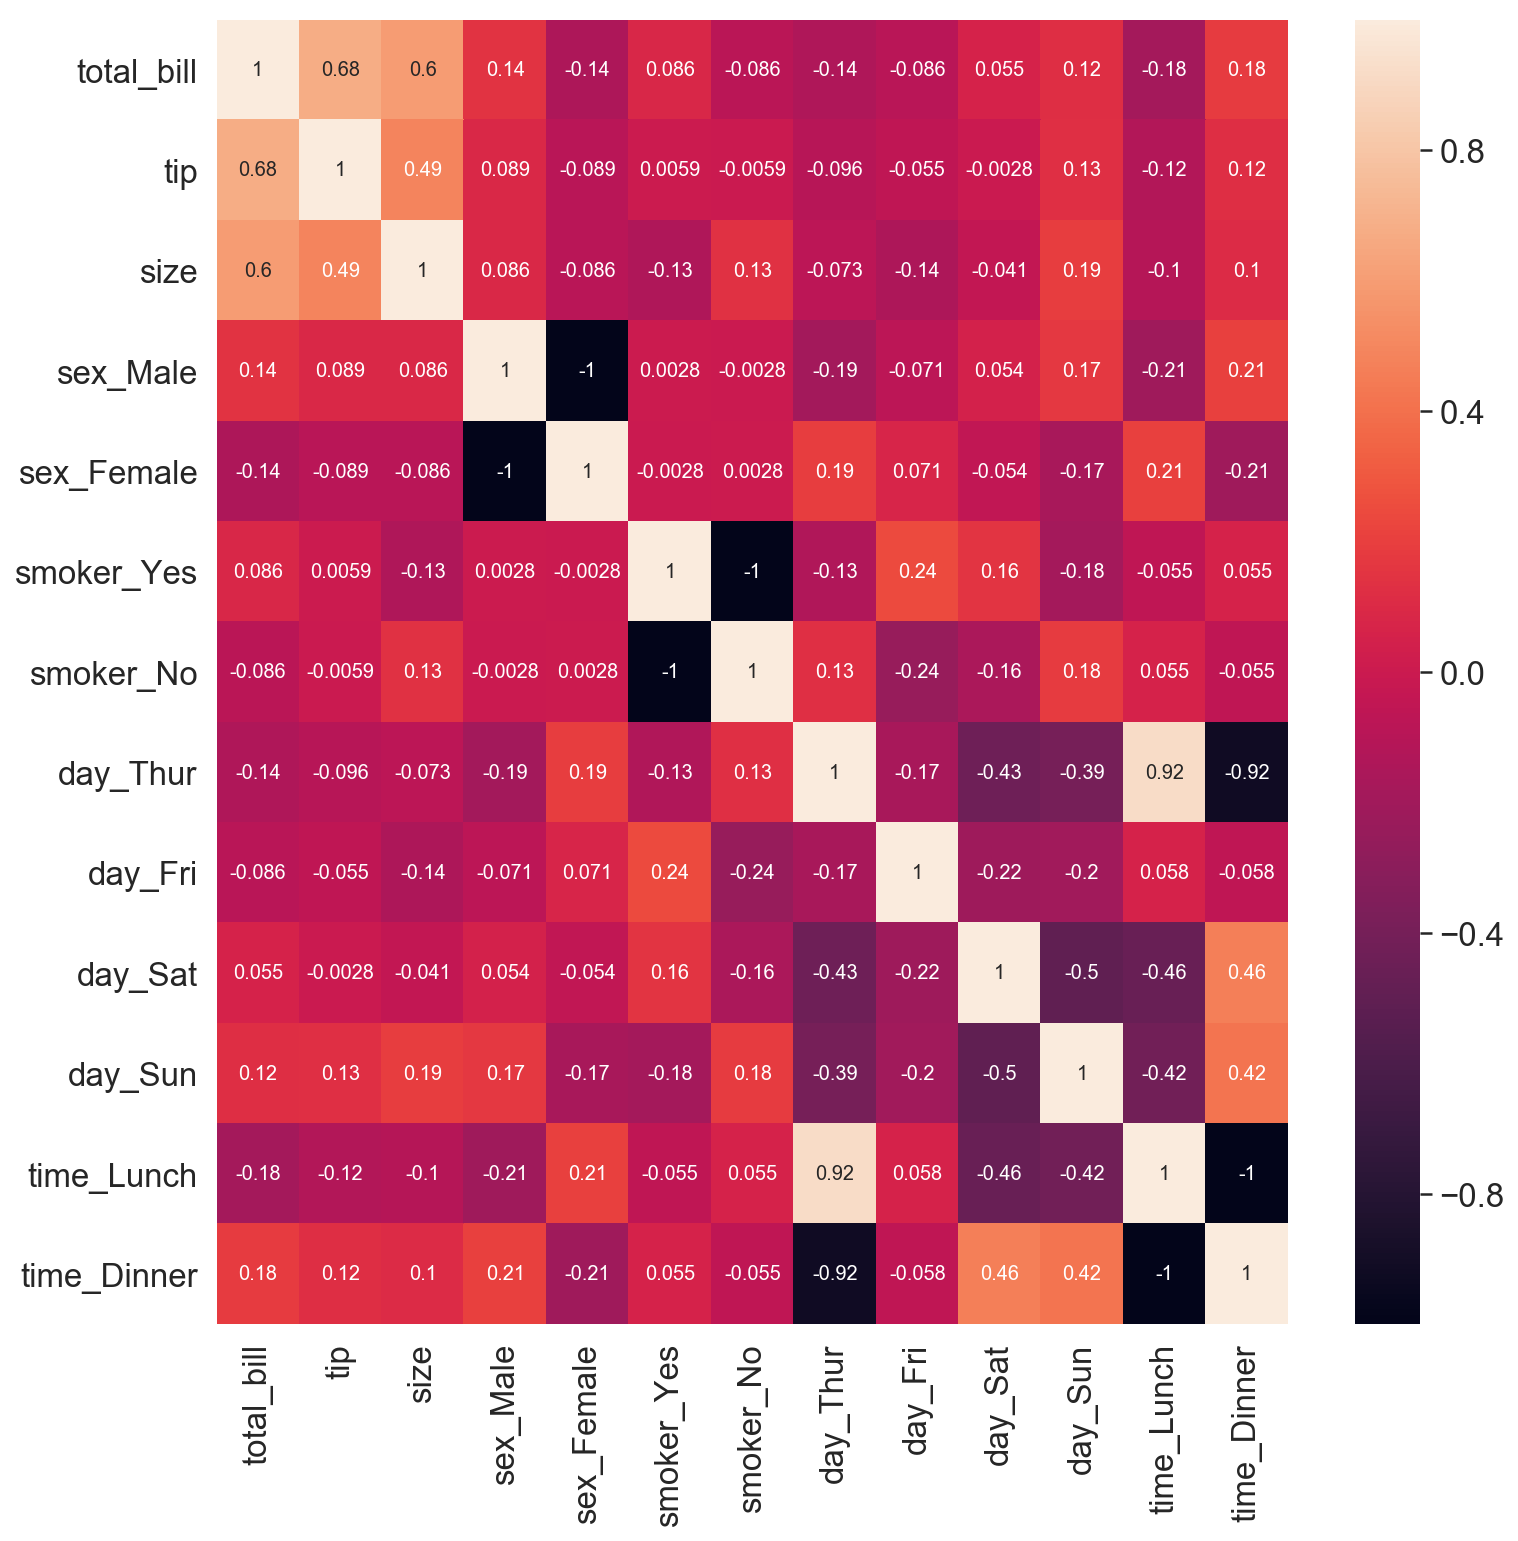

In [7]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(tips_dum.corr(),annot=True,ax=ax)
plt.show()

In [8]:
tips_temp.head()

,total_bill,tip,day,time,size,sex_Male,sex_Female,smoker_Yes,smoker_No
0,16.99,1.01,Sun,Dinner,2,0,1,0,1
1,10.34,1.66,Sun,Dinner,3,1,0,0,1
2,21.01,3.50,Sun,Dinner,3,1,0,0,1
3,23.68,3.31,Sun,Dinner,2,1,0,0,1
4,24.59,3.61,Sun,Dinner,4,0,1,0,1


In [9]:
tips_dum = pd.get_dummies(tips)
tips_dum.head()

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,0,1,0,1,0,0,0,1,0,1
1,10.34,1.66,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3.50,3,1,0,0,1,0,0,0,1,0,1
3,23.68,3.31,2,1,0,0,1,0,0,0,1,0,1
4,24.59,3.61,4,0,1,0,1,0,0,0,1,0,1


### Fit the model

Now we fit the model. We use rescaling to be able to apply regularized regression. Rescaling can be applied to dummified variables. The result will be that the possible values 0 and 1 are translated into one positive and one negative number.

In [10]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#### Choose outcome and predictor variables

In [11]:
y = tips_dum.pop('tip')
X = tips_dum

In [12]:
tips_dum.head()

,total_bill,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,2,0,1,0,1,0,0,0,1,0,1
1,10.34,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3,1,0,0,1,0,0,0,1,0,1
3,23.68,2,1,0,0,1,0,0,0,1,0,1
4,24.59,4,0,1,0,1,0,0,0,1,0,1


#### Create train-test split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

#### Rescale the variables

> Note that while we use `.fit_transform` on the training data,
we only use `.transform` on the test data. This reflects that we cannot rescale with the mean and standard deviation of data which we have not seen before.

In [14]:
X_train.describe()

,total_bill,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,19.530615,2.564103,0.661538,0.338462,0.353846,0.646154,0.271795,0.066667,0.323077,0.338462,0.292308,0.707692
std,8.902420,0.979029,0.474404,0.474404,0.479393,0.479393,0.446030,0.250086,0.468856,0.474404,0.455994,0.455994
min,5.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.325000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,17.290000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,23.390000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,48.330000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
X_test.describe()

,total_bill,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.00000,49.00000
mean,20.802041,2.591837,0.571429,0.428571,0.489796,0.510204,0.183673,0.122449,0.489796,0.204082,0.22449,0.77551
std,8.921021,0.839602,0.500000,0.500000,0.505076,0.505076,0.391230,0.331201,0.505076,0.407206,0.42157,0.42157
min,3.070000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
25%,13.420000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.00000
50%,20.650000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.00000
75%,25.280000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.00000,1.00000
max,50.810000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000


In [16]:
scaler = StandardScaler()

In [17]:
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


In [18]:
X_test.describe()

,total_bill,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,0.143186,0.028401,-0.190432,0.190432,0.284317,-0.284317,-0.198077,0.223627,0.356502,-0.283989,-0.149108,0.149108
std,1.004669,0.859794,1.056666,1.056666,1.056287,1.056287,0.879397,1.327756,1.080026,0.860561,0.926888,0.926888
min,-1.853764,-1.601718,-1.398051,-0.715282,-0.740013,-1.351328,-0.610933,-0.267261,-0.690849,-0.715282,-0.642685,-1.555973
25%,-0.688166,-0.577669,-1.398051,-0.715282,-0.740013,-1.351328,-0.610933,-0.267261,-0.690849,-0.715282,-0.642685,0.642685
50%,0.126063,-0.577669,0.715282,-0.715282,-0.740013,0.740013,-0.610933,-0.267261,-0.690849,-0.715282,-0.642685,0.642685
75%,0.647485,0.446380,0.715282,1.398051,1.351328,0.740013,-0.610933,-0.267261,1.447494,-0.715282,-0.642685,0.642685
max,3.522626,1.470429,0.715282,1.398051,1.351328,0.740013,1.636840,3.741657,1.447494,1.398051,1.555973,0.642685


#### Linear regression model

In [19]:
model = LinearRegression()
model.fit(X_train,y_train)

print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.44159401897773914
0.4875817254349357


In [20]:
print('Intercept:',model.intercept_)
pd.DataFrame(list(zip(X_train.columns,model.coef_)))

Intercept: 2.934923076923077


,0,1
0,total_bill,0.721351
1,size,0.234427
2,sex_Male,-0.011611
3,sex_Female,0.011611
4,smoker_Yes,-0.036140
5,smoker_No,0.036140
6,day_Thur,-0.128475
7,day_Fri,0.032704
8,day_Sat,0.057806
9,day_Sun,0.046421


#### Lasso model

If we do not drop the redundant columns, the Lasso reduces them to zero even with mild regularization strength. Usually it is much better to avoid having redundant variables (you would not have very much control which one is driven to zero and it can lead to many further problems).

In [29]:
model = Lasso(alpha=10**(-6),max_iter=100000)
model.fit(X_train,y_train)

print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.44159401895173056
0.4875834831377506


In [22]:
print('Intercept:',model.intercept_)
pd.DataFrame(list(zip(X_train.columns,model.coef_)))

Intercept: 2.934923076923077


,0,1
0,total_bill,7.213497e-01
1,size,2.344263e-01
2,sex_Male,-2.322101e-02
3,sex_Female,1.273914e-15
4,smoker_Yes,-7.227863e-02
5,smoker_No,0.000000e+00
6,day_Thur,-1.720965e-01
7,day_Fri,8.234692e-03
8,day_Sat,1.192602e-02
9,day_Sun,-0.000000e+00


### Drop redundant variables

We can avoid having redundant variables by indicating `drop_first=True`.
This is really important because otherwise we might end up with 
problems in our regression models.

In [30]:
tips_dum = pd.get_dummies(tips,drop_first=True)
tips_dum.head()
y = tips_dum.pop('tip')
X = tips_dum
X.head()

,total_bill,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,2,1,1,0,0,1,1
1,10.34,3,0,1,0,0,1,1
2,21.01,3,0,1,0,0,1,1
3,23.68,2,0,1,0,0,1,1
4,24.59,4,1,1,0,0,1,1


In [41]:
X.dtypes

total_bill     float64
size             int64
sex_Female       uint8
smoker_No        uint8
day_Fri          uint8
day_Sat          uint8
day_Sun          uint8
time_Dinner      uint8
dtype: object

### Fit the model

#### Create train-test split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

#### Rescale the variables

> Note that while we use `.fit_transform` on the training data,
we only use `.transform` on the test data. This reflects that we cannot rescale with the mean and standard deviation of data which we have not seen before.

In [32]:
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


In [39]:
X_train.head()

,total_bill,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,-0.286119,-0.577669,1.398051,0.740013,-0.267261,-0.690849,1.398051,0.642685
1,0.026959,1.470429,-0.715282,0.740013,-0.267261,-0.690849,1.398051,0.642685
2,1.371620,1.470429,-0.715282,0.740013,-0.267261,-0.690849,1.398051,0.642685
3,-0.622848,-0.577669,-0.715282,0.740013,-0.267261,1.447494,-0.715282,0.642685
4,-0.367204,-0.577669,1.398051,-1.351328,3.741657,-0.690849,-0.715282,-1.555973


In [33]:
X_train.smoker_No.unique()

array([ 0.74001287, -1.35132785])

In [34]:
tips.smoker.value_counts(normalize=True)

No     0.618852
Yes    0.381148
Name: smoker, dtype: float64

#### Linear regression model

In [35]:
model = LinearRegression()
model.fit(X_train,y_train)

print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.44159401897773914
0.4875817254349355


In [36]:
print('Intercept:',model.intercept_)
pd.DataFrame(list(zip(X_train.columns,model.coef_)))

Intercept: 2.934923076923077


,0,1
0,total_bill,0.721351
1,size,0.234427
2,sex_Female,0.023222
3,smoker_No,0.072280
4,day_Fri,0.104739
5,day_Sat,0.192855
6,day_Sun,0.183069
7,time_Dinner,-0.207138


#### Lasso model

In [37]:
model = Lasso(alpha=10**(-3),max_iter=100000)
model.fit(X_train,y_train)

print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.44148291351093355
0.49076665123473806


In [38]:
print('Intercept:',model.intercept_)
pd.DataFrame(list(zip(X_train.columns,model.coef_)))

Intercept: 2.934923076923077


,0,1
0,total_bill,0.719425
1,size,0.234296
2,sex_Female,0.022580
3,smoker_No,0.070644
4,day_Fri,0.082932
5,day_Sat,0.137620
6,day_Sun,0.127626
7,time_Dinner,-0.156189


### Interpret the model coefficients of dummy variables

The model coefficients of categorical predictors can be interpreted in the following way.

Our model will contain a contribution to the outcome variable like

$$
\beta_{\rm smoker\_No}\ x_{\rm smoker\_no} \approx 0.07\ x_{\rm smoker\_no}
$$

Originally, we can have either $x_{\rm smoker\_no}=0$ or $x_{\rm smoker\_no}=1$. Only in the second case there would be a contribution. This would be interpreted in the following way:

> The tip, i.e. the outcome variable $y$, will be 0.07 $ higher for non-smokers than for smokers.

After rescaling we have in fact 0.74 and -1.35 as possible values for $x_{\rm smoker\_no}$. The two possibilities will either lead to an increase or a decrease of tip as given by the product of the coefficient and the $x$-value.

## Dummy practice

Now practice dummifying on the autostats dataset.

- Decide which columns should be dummified.
- It won't make sense to create as many dummy variables as observations. 
    - Rather try to create categories, for example the car brand (this is the first word in column name).
    - To extract the brand names, remember the `.map` function and the `.split` function for strings.
    - Note that there are some spelling mistakes in the car brand names. 
    - Remember panda's `.replace` function to replace entries in a dataframe column using a dictionary.
- Don't forget to remove missing values (which might not be encoded properly as `NaN`).
- Use continuous as well as dummified variables to predict `mpg` with linear regression or the Lasso.

Which categories are most predictive of the `mpg`?

In [42]:
df = pd.read_csv('../../../../resource-datasets/auto_stats/Auto.csv')

In [43]:
user_col_name = df.name.unique()

In [44]:
f = lambda x: x.split(' ')[0]
df['manu'] = df.name.map(f)

In [45]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,manu
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,buick
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,plymouth
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,amc
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,ford


In [46]:
name_replce = {"chevy":"chevrolet", "toyout":"toyata", "hi":"hyundai",
              "maxda":"mazda","chevroelt":"chevrolet","vw":"volkswagen",
              "mercedes-benz":'mercedes'}

In [47]:
df.manu = df.manu.replace(name_replce)

In [48]:
df.corr()

,mpg,cylinders,displacement,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.933104,-0.544162,-0.369804,-0.610664
weight,-0.831739,0.897017,0.933104,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.581265,0.210084,0.184314,1.000000


In [49]:
df.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [50]:
df.horsepower.replace('?', np.nan, inplace = True)

In [51]:
df.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', nan, '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [52]:
df  = df.dropna()

In [53]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
manu            0
dtype: int64

In [54]:
df.horsepower = df.horsepower.astype('int')

In [55]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
manu             object
dtype: object

In [56]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name', 'manu'],
      dtype='object')

In [57]:
df_temp = pd.get_dummies(df,columns=["manu","origin","cylinders"])
df_temp

,mpg,displacement,horsepower,weight,acceleration,year,name,manu_amc,manu_audi,manu_bmw,...,manu_volkswagen,manu_volvo,origin_1,origin_2,origin_3,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8
0,18.0,307.0,130,3504,12.0,70,chevrolet chevelle malibu,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,15.0,350.0,165,3693,11.5,70,buick skylark 320,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,18.0,318.0,150,3436,11.0,70,plymouth satellite,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,16.0,304.0,150,3433,12.0,70,amc rebel sst,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,17.0,302.0,140,3449,10.5,70,ford torino,0,0,0,...,0,0,1,0,0,0,0,0,0,1
5,15.0,429.0,198,4341,10.0,70,ford galaxie 500,0,0,0,...,0,0,1,0,0,0,0,0,0,1
6,14.0,454.0,220,4354,9.0,70,chevrolet impala,0,0,0,...,0,0,1,0,0,0,0,0,0,1
7,14.0,440.0,215,4312,8.5,70,plymouth fury iii,0,0,0,...,0,0,1,0,0,0,0,0,0,1
8,14.0,455.0,225,4425,10.0,70,pontiac catalina,0,0,0,...,0,0,1,0,0,0,0,0,0,1
9,15.0,390.0,190,3850,8.5,70,amc ambassador dpl,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [58]:
df_temp.drop(columns="name",axis=1, inplace=True)

In [59]:
df_temp.columns

Index(['mpg', 'displacement', 'horsepower', 'weight', 'acceleration', 'year',
       'manu_amc', 'manu_audi', 'manu_bmw', 'manu_buick', 'manu_cadillac',
       'manu_capri', 'manu_chevrolet', 'manu_chrysler', 'manu_datsun',
       'manu_dodge', 'manu_fiat', 'manu_ford', 'manu_honda', 'manu_hyundai',
       'manu_mazda', 'manu_mercedes', 'manu_mercury', 'manu_nissan',
       'manu_oldsmobile', 'manu_opel', 'manu_peugeot', 'manu_plymouth',
       'manu_pontiac', 'manu_renault', 'manu_saab', 'manu_subaru',
       'manu_toyota', 'manu_toyouta', 'manu_triumph', 'manu_vokswagen',
       'manu_volkswagen', 'manu_volvo', 'origin_1', 'origin_2', 'origin_3',
       'cylinders_3', 'cylinders_4', 'cylinders_5', 'cylinders_6',
       'cylinders_8'],
      dtype='object')

In [60]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [61]:
y = df_temp.pop("mpg")
X = df_temp

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [63]:
scaler = StandardScaler()

In [64]:
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


In [65]:
X_train.describe()

,displacement,horsepower,weight,acceleration,year,manu_amc,manu_audi,manu_bmw,manu_buick,manu_cadillac,...,manu_volkswagen,manu_volvo,origin_1,origin_2,origin_3,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8
count,3.130000e+02,3.130000e+02,3.130000e+02,3.130000e+02,3.130000e+02,3.130000e+02,3.130000e+02,3.130000e+02,3.130000e+02,3.130000e+02,...,3.130000e+02,3.130000e+02,3.130000e+02,3.130000e+02,3.130000e+02,3.130000e+02,3.130000e+02,3.130000e+02,3.130000e+02,3.130000e+02
mean,1.191805e-16,1.986342e-17,-1.042829e-16,-3.426439e-16,3.171052e-16,9.577004e-18,-1.065885e-16,9.390784e-17,-9.346446e-17,1.528774e-16,...,-1.243237e-16,1.246784e-16,3.972683e-17,-1.159882e-16,4.398328e-17,-2.119355e-17,2.908572e-17,8.956272e-18,-2.837631e-17,-9.647944e-17
std,1.001601e+00,1.001601e+00,1.001601e+00,1.001601e+00,1.001601e+00,1.001601e+00,1.001601e+00,1.001601e+00,1.001601e+00,1.001601e+00,...,1.001601e+00,1.001601e+00,1.001601e+00,1.001601e+00,1.001601e+00,1.001601e+00,1.001601e+00,1.001601e+00,1.001601e+00,1.001601e+00
min,-1.185358e+00,-1.503753e+00,-1.591272e+00,-2.647689e+00,-1.615977e+00,-2.542161e-01,-1.397998e-01,-5.661385e-02,-2.081666e-01,-8.019269e-02,...,-2.470161e-01,-1.274118e-01,-1.259673e+00,-4.718647e-01,-5.069794e-01,-1.137760e-01,-1.055872e+00,-9.837388e-02,-4.970030e-01,-5.810394e-01
25%,-8.341775e-01,-7.377410e-01,-8.760130e-01,-6.264045e-01,-7.984110e-01,-2.542161e-01,-1.397998e-01,-5.661385e-02,-2.081666e-01,-8.019269e-02,...,-2.470161e-01,-1.274118e-01,-1.259673e+00,-4.718647e-01,-5.069794e-01,-1.137760e-01,-1.055872e+00,-9.837388e-02,-4.970030e-01,-5.810394e-01
50%,-4.829973e-01,-2.886996e-01,-2.433747e-01,-7.514505e-02,1.915490e-02,-2.542161e-01,-1.397998e-01,-5.661385e-02,-2.081666e-01,-8.019269e-02,...,-2.470161e-01,-1.274118e-01,7.938566e-01,-4.718647e-01,-5.069794e-01,-1.137760e-01,9.470848e-01,-9.837388e-02,-4.970030e-01,-5.810394e-01
75%,6.876031e-01,4.508980e-01,7.232873e-01,5.863662e-01,8.367208e-01,-2.542161e-01,-1.397998e-01,-5.661385e-02,-2.081666e-01,-8.019269e-02,...,-2.470161e-01,-1.274118e-01,7.938566e-01,-4.718647e-01,-5.069794e-01,-1.137760e-01,9.470848e-01,-9.837388e-02,-4.970030e-01,1.721054e+00
max,2.589829e+00,3.356460e+00,2.571630e+00,3.342663e+00,1.654287e+00,3.933660e+00,7.153088e+00,1.766352e+01,4.803845e+00,1.246996e+01,...,4.048319e+00,7.848567e+00,7.938566e-01,2.119252e+00,1.972467e+00,8.789198e+00,9.470848e-01,1.016530e+01,2.012060e+00,1.721054e+00


In [66]:
X_test.describe()

,displacement,horsepower,weight,acceleration,year,manu_amc,manu_audi,manu_bmw,manu_buick,manu_cadillac,...,manu_volkswagen,manu_volvo,origin_1,origin_2,origin_3,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,7.900000e+01,...,79.000000,79.000000,79.000000,79.000000,79.000000,7.900000e+01,79.000000,7.900000e+01,79.000000,79.000000
mean,0.237144,0.201802,0.095968,-0.297510,0.067450,0.169873,-0.047485,0.167692,0.045606,-8.019269e-02,...,-0.083902,-0.026450,0.118011,-0.111076,-0.036198,-1.137760e-01,-0.193840,-9.837388e-02,0.169963,0.118331
std,1.079467,1.065846,1.009014,1.033801,1.017590,1.271473,0.820514,1.993671,1.105890,1.256982e-16,...,0.826235,0.897368,0.971102,0.902770,0.978655,5.586586e-17,0.998059,1.396646e-16,1.115512,1.065489
min,-1.019523,-1.450924,-1.370557,-2.831442,-1.615977,-0.254216,-0.139800,-0.056614,-0.208167,-8.019269e-02,...,-0.247016,-0.127412,-1.259673,-0.471865,-0.506979,-1.137760e-01,-1.055872,-9.837388e-02,-0.497003,-0.581039
25%,-0.800035,-0.500013,-0.789261,-0.993911,-0.798411,-0.254216,-0.139800,-0.056614,-0.208167,-8.019269e-02,...,-0.247016,-0.127412,-1.259673,-0.471865,-0.506979,-1.137760e-01,-1.055872,-9.837388e-02,-0.497003,-0.581039
50%,0.346178,-0.077386,-0.055708,-0.258898,0.019155,-0.254216,-0.139800,-0.056614,-0.208167,-8.019269e-02,...,-0.247016,-0.127412,0.793857,-0.471865,-0.506979,-1.137760e-01,-1.055872,-9.837388e-02,-0.497003,-0.581039
75%,1.121701,0.979182,0.802957,0.347487,0.836721,-0.254216,-0.139800,-0.056614,-0.208167,-8.019269e-02,...,-0.247016,-0.127412,0.793857,-0.471865,-0.506979,-1.137760e-01,0.947085,-9.837388e-02,2.012060,1.721054
max,2.589829,3.224389,2.402848,2.938406,1.654287,3.933660,7.153088,17.663522,4.803845,-8.019269e-02,...,4.048319,7.848567,0.793857,2.119252,1.972467,-1.137760e-01,0.947085,-9.837388e-02,2.012060,1.721054


In [67]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [68]:
print(model.score(X_train,y_train)) #not very good

0.8659467624858583


In [69]:
print(model.score(X_test,y_test))  #not very good

-3.865358950015063e+22


In [70]:
print(model.intercept_)

23.40425421829821


In [71]:
model = Lasso(alpha=10**(-3),max_iter=1000000)
model.fit(X_train,y_train)

print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.8659453476995498
0.8300106797314846


In [72]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import r2_score


In [73]:
optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso.fit(X_train, y_train)
print(optimal_lasso.alpha_)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.14692400261927088


.............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.0s finished


In [74]:
lasso = Lasso(alpha=optimal_lasso.alpha_)
lasso_scores = cross_val_score(lasso, X_train, y_train, cv=10)
print(lasso_scores)
print(np.mean(lasso_scores))


[0.82927324 0.8014429  0.78231    0.79166076 0.79190932 0.84875677
 0.77275999 0.88705262 0.84869658 0.93424752]
0.8288109707494418


In [75]:
lasso.fit(X_train,y_train)
print(lasso.score(X_train,y_train))
predictions = lasso.predict(X_train)

0.8555110249811533


In [76]:
predictions = lasso.predict(X_train)


In [77]:
residuals = predictions-y_train

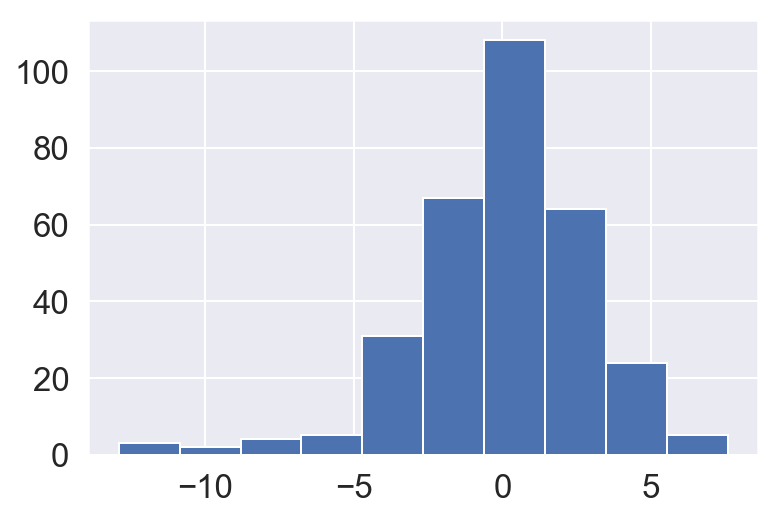

In [78]:
residuals.hist(bins=10)

In [79]:
lasso_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})
lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)
lasso_coefs.head(20)


,variable,coef,abs_coef
2,weight,-4.020757,4.020757
4,year,2.463070,2.463070
1,horsepower,-1.050497,1.050497
43,cylinders_6,-0.981589,0.981589
40,cylinders_3,-0.731187,0.731187
37,origin_1,-0.669482,0.669482
26,manu_plymouth,0.267303,0.267303
27,manu_pontiac,0.244190,0.244190
16,manu_ford,-0.208460,0.208460
13,manu_datsun,0.196406,0.196406


In [80]:
print('Percent variables zeroed out:', 
      np.sum((np.abs(lasso.coef_) < 0.2))/float(X.shape[0]))


Percent variables zeroed out: 0.09183673469387756


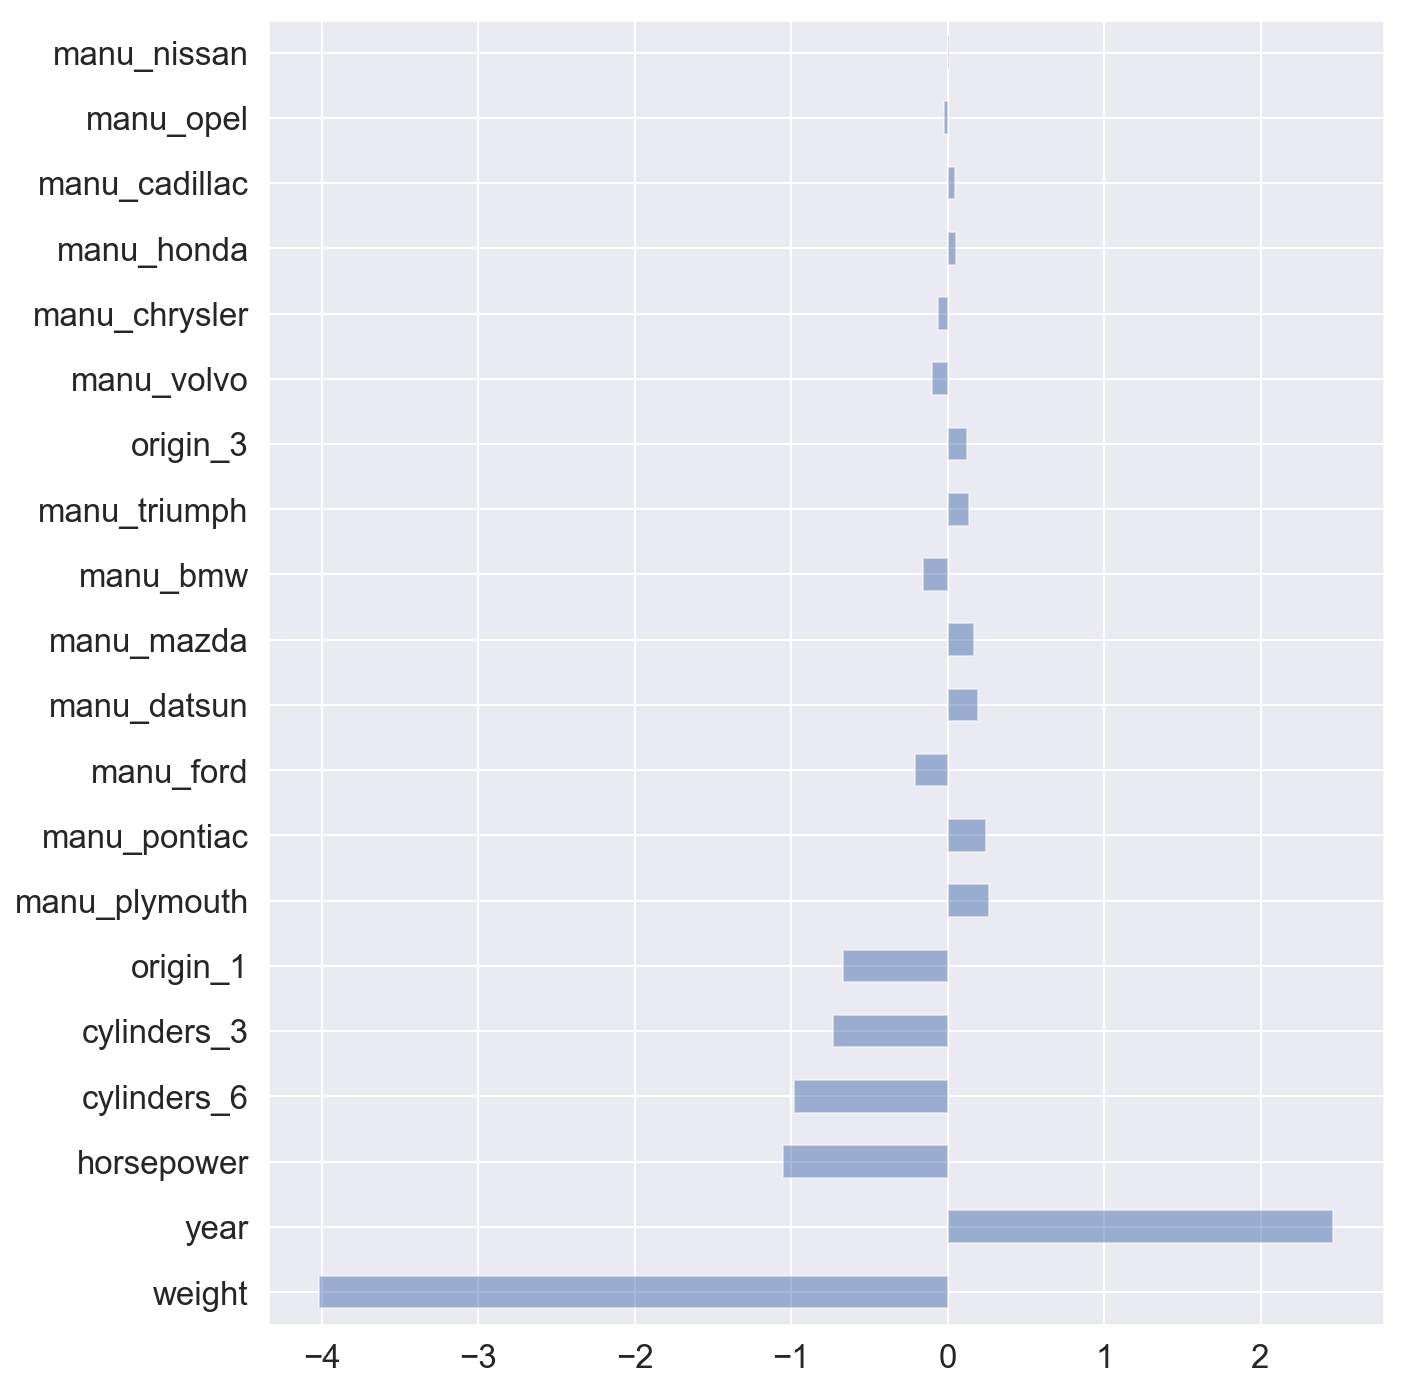

In [81]:
fig, ax = plt.subplots(figsize=(10,12))
lasso_coefs.coef[:20].plot(kind='barh',ax=ax,alpha=0.5)
ax.set_yticklabels(lasso_coefs.variable[:20].values)
plt.show()


In [82]:
df_dum = pd.get_dummies(df)

In [83]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,manu
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,buick
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,plymouth
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,amc
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,ford


In [84]:
df_dum.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name_amc ambassador brougham,name_amc ambassador dpl,...,manu_pontiac,manu_renault,manu_saab,manu_subaru,manu_toyota,manu_toyouta,manu_triumph,manu_vokswagen,manu_volkswagen,manu_volvo
0,18.0,8,307.0,130,3504,12.0,70,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0,...,0,0,0,0,0,0,0,0,0,0
